LSTM stands for Long Short Term Memory Networks. It is a type of recurrent neural network that is commonly used for regression and time series forecasting in machine learning. It can memorize data for long periods, which differentiates LSTM neural networks from other neural networks.

In [24]:
pip install yfinance


In [25]:
print(data.columns)


MultiIndex([(  'Date',     ''),
            (  'Open', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            ( 'Close', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [26]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('AAPL',
                      start=start_date,
                      end=end_date,
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

Price,Date,Open,High,Low,Close,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
3436,2025-03-10,235.539993,236.160004,224.220001,227.479996,72071200
3437,2025-03-11,223.809998,225.839996,217.449997,220.839996,76137400
3438,2025-03-12,220.139999,221.750000,214.910004,216.979996,62547500
3439,2025-03-13,215.949997,216.839996,208.419998,209.679993,61368300
3440,2025-03-14,211.250000,213.949997,209.580002,213.490005,60060200


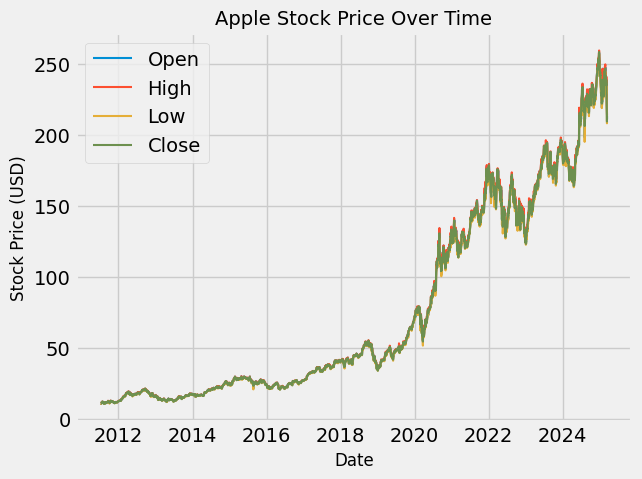

In [27]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

for col in ["Open", "High", "Low", "Close"]:
    plt.plot(data["Date"], data[col], label=col, linewidth=1.5)  # Plot each float column

plt.xlabel("Date", fontsize=12)
plt.ylabel("Stock Price (USD)", fontsize=12)
plt.title("Apple Stock Price Over Time", fontsize=14)
plt.legend()  # Add legend
plt.grid(True)  # Add grid for better readability

# Show plot
plt.show()

In [ ]:
correlation = data.corr()
print(correlation["Close"].sort_values(ascending=False))

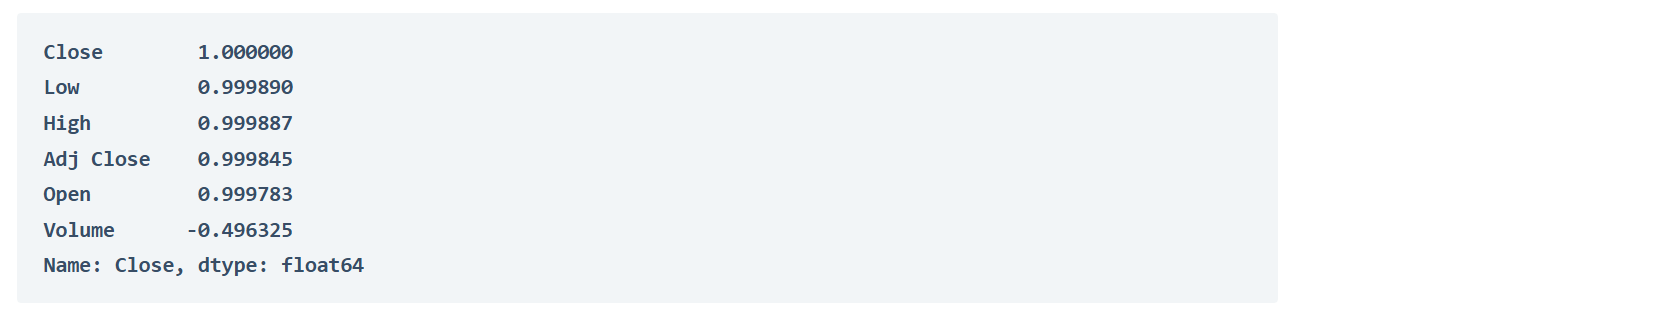

In [31]:
x = data[["Open", "High", "Low", "Volume"]]
y = data["Close"]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (xtrain.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 4, 128)              │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(xtrain, ytrain, batch_size=1, epochs=30)

Epoch 1/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 2193.7478
Epoch 2/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 19.4681
Epoch 3/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 24.8393
Epoch 4/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 22.3000
Epoch 5/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 17.8948
Epoch 6/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 10.4687
Epoch 7/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - loss: 16.4546
Epoch 8/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 14.4514
Epoch 9/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 25.7403
Epoch 10/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 19.9357
Epoch 11/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - loss: 10.9055
Epoch 12/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 10.1924
Epoch 13/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 17s 6ms/step - loss: 10.3427
Epoch 14/30
2752/2752 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 14.9934

In [34]:
import numpy as np
#features = [Open, High, Low, Adj Close, Volume]
features = np.array([[177.089996, 180.419998, 177.070007, 74919600]])
model.predict(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step


array([[179.66878]], dtype=float32)